In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset and storing it in a dataframe
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory =False)

In [3]:
# checking the dataset
df.head()

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [4]:
# checking the sahpe of dataset 
df.shape

(300698, 53)

In [5]:
df['Created Date'] = pd.to_datetime(df['Created Date']) # coverting datetime object to time delta 

In [6]:
df['Closed Date'] = pd.to_datetime(df['Closed Date']) # coverting datetime object to time delta

In [7]:
df.head()

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [8]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date'] # creating a column to store time taken to close the complain

In [9]:
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.seconds #converting time to seconds

In [10]:
df['Request_Closing_Time'] = df['Request_Closing_Time']/3600 # converting time to hours

In [11]:
df.head()

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Direction Road Ramp  \
0    71 VERMILYEA AVENUE  ...                      NaN       NaN   
1        27-07 23 AVENUE  ...                      NaN       NaN   
2  2897 VALENTINE AVENUE  ...                      NaN       NaN   
3    2940 BAISLEY AVENUE  ...                      NaN       NaN   
4          87-14 57 ROAD  ...                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   
3                    NaN             NaN             NaN                 NaN   
4                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  \
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)   
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)   
2  40.870325 -73.888525  (40.870324522111424, -73.88852464418646)   
3  40.835994 -73.828379   (40.83599404683083, -73.82837939584206)   
4  40.733060 -73.874170  (40.733059618956815, -73.87416975810375)   

  Request_Closing_Time  
0             0.920833  
1             1.437778  
2             4.858611  
3             7.753889  
4             3.450556  

[5 rows x 54 columns]

In [12]:
df.columns # Checking 

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [13]:
Complaints = df[['City','Complaint Type','Location Type','Status','Borough','Latitude','Longitude', 'Request_Closing_Time']]
Complaints.head()

City           Complaint Type    Location Type  Status    Borough  \
0  NEW YORK  Noise - Street/Sidewalk  Street/Sidewalk  Closed  MANHATTAN   
1   ASTORIA         Blocked Driveway  Street/Sidewalk  Closed     QUEENS   
2     BRONX         Blocked Driveway  Street/Sidewalk  Closed      BRONX   
3     BRONX          Illegal Parking  Street/Sidewalk  Closed      BRONX   
4  ELMHURST          Illegal Parking  Street/Sidewalk  Closed     QUEENS   

    Latitude  Longitude  Request_Closing_Time  
0  40.865682 -73.923501              0.920833  
1  40.775945 -73.915094              1.437778  
2  40.870325 -73.888525              4.858611  
3  40.835994 -73.828379              7.753889  
4  40.733060 -73.874170              3.450556

In [14]:
status = Complaints['Status'].value_counts() # getting complaint status 

In [15]:
#Top 10 Complaint Types
groupby_complaint_type = Complaints['Complaint Type'].value_counts().nlargest(10)
groupby_complaint_type # getting highest complaints 

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

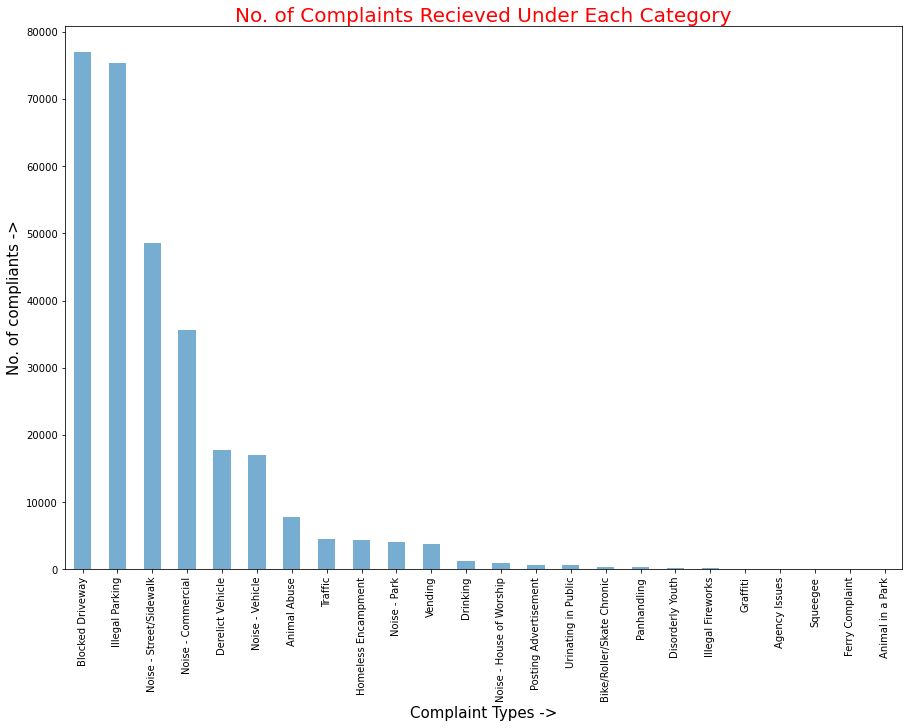

In [16]:
# Graph representing complaints under each category 
Complaints['Complaint Type'].value_counts().plot(kind ='bar', alpha=0.6 ,figsize =(15,10))
plt.title("No. of Complaints Recieved Under Each Category", fontsize = 20, color='red',pad ='3.0')
plt.xlabel('Complaint Types ->', fontsize = 15)
plt.ylabel('No. of compliants ->' , fontsize = 15)
plt.show()

### Conclusion 
Top five complaints registrerd are:
   - Blocked Driveway     -77044
   - Illegal Parking      -75361
   - Noise-Street/Sidewalk-48612
   - Noise-Commercial     -35577
   - Derelict Vehicle     -17718

In [17]:
#Top 10 cities with complaints
groupby_city = Complaints['City'].value_counts().nlargest(10)
groupby_city #getting city with highest complaints 

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

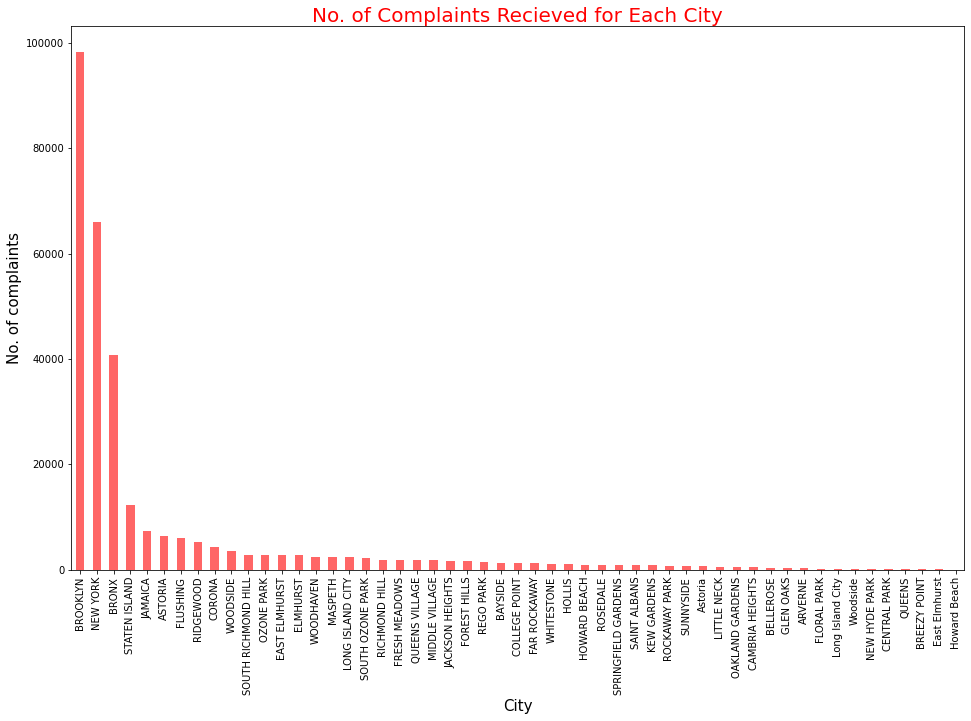

In [47]:
# Graph representing cities and complaints registered 
Complaints['City'].value_counts().plot(kind ='bar', alpha=0.6 ,figsize =(16,10),color='red')
plt.title("No. of Complaints Recieved for Each City", fontsize = 20, color='red',pad ='3.0')
plt.xlabel('City', fontsize = 15)
plt.ylabel('No. of complaints' , fontsize = 15)
plt.show()

### Conclusion 
Top 5 cities as per the number of complaints recieved:
 - Brooklyn (98307)
 - New York (65994)
 - Bronx (40702)
 - Staten Island (12343)
 - Jamaica (7296)

In [19]:
Top_city = Complaints[Complaints['City']== 'BROOKLYN']
Blocked_Driveway = Top_city[Top_city['Complaint Type'] == 'Blocked Driveway']
Blocked_Driveway.head()

City    Complaint Type    Location Type  Status   Borough   Latitude  \
9    BROOKLYN  Blocked Driveway  Street/Sidewalk  Closed  BROOKLYN  40.623793   
36   BROOKLYN  Blocked Driveway  Street/Sidewalk  Closed  BROOKLYN  40.670843   
102  BROOKLYN  Blocked Driveway  Street/Sidewalk  Closed  BROOKLYN  40.689303   
110  BROOKLYN  Blocked Driveway  Street/Sidewalk  Closed  BROOKLYN  40.638963   
117  BROOKLYN  Blocked Driveway  Street/Sidewalk  Closed  BROOKLYN  40.630849   

     Longitude  Request_Closing_Time  
9   -73.999539              1.383889  
36  -73.935556              0.312500  
102 -73.943395              0.546667  
110 -73.911903              4.416667  
117 -73.901790              4.578889

In [20]:
Blocked_Driveway['Complaint Type'].value_counts()

Blocked Driveway    28148
Name: Complaint Type, dtype: int64

# Cluster Map


Preparing a cluster map for the Blocked Driveway in Brooklyn 

In [21]:
import folium
import math
from folium.plugins import MarkerCluster
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.subplots import make_subplots

## Cluster Map (Blocked_Driveway , Brooklyn)

In [22]:
# Base Map
Blyn = (40.6782,-73.9442)
m= folium.Map(location = Blyn, tile = 'stamen terrain', zoom_start =12)

# Cluster Map of Blocked Driveway compliants in Brooklyn  
mc = MarkerCluster()
for idx,row in Blocked_Driveway.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(folium.Marker([row['Latitude'],row['Longitude']]))
m.add_child(mc)

In [23]:
Test_df = Complaints[['Complaint Type','Request_Closing_Time']]
Test_df.head()

Complaint Type  Request_Closing_Time
0  Noise - Street/Sidewalk              0.920833
1         Blocked Driveway              1.437778
2         Blocked Driveway              4.858611
3          Illegal Parking              7.753889
4          Illegal Parking              3.450556

In [24]:
Test_df.isnull().sum() #checking null or NaN values in the dataframe 

Complaint Type             0
Request_Closing_Time    2164
dtype: int64

In [25]:
# Test_final = Test_df.dropna() # dropping the rows with NaN values in Request_Closing_Time
# Test_final.isnull().sum() # Checking if NaN values are completely removed 

In [26]:
# Average time to address each complaint types
Test_df1 = Test_df.groupby(by= 'Complaint Type').mean()
Test_df1.head()

Request_Closing_Time
Complaint Type                                 
Agency Issues                          5.260324
Animal Abuse                           4.626220
Animal in a Park                       0.834722
Bike/Roller/Skate Chronic              3.540047
Blocked Driveway                       4.384702

In [27]:
Test_df1.sort_values(by='Request_Closing_Time', ascending = False)
Test_df1.head()

Request_Closing_Time
Complaint Type                                 
Agency Issues                          5.260324
Animal Abuse                           4.626220
Animal in a Park                       0.834722
Bike/Roller/Skate Chronic              3.540047
Blocked Driveway                       4.384702

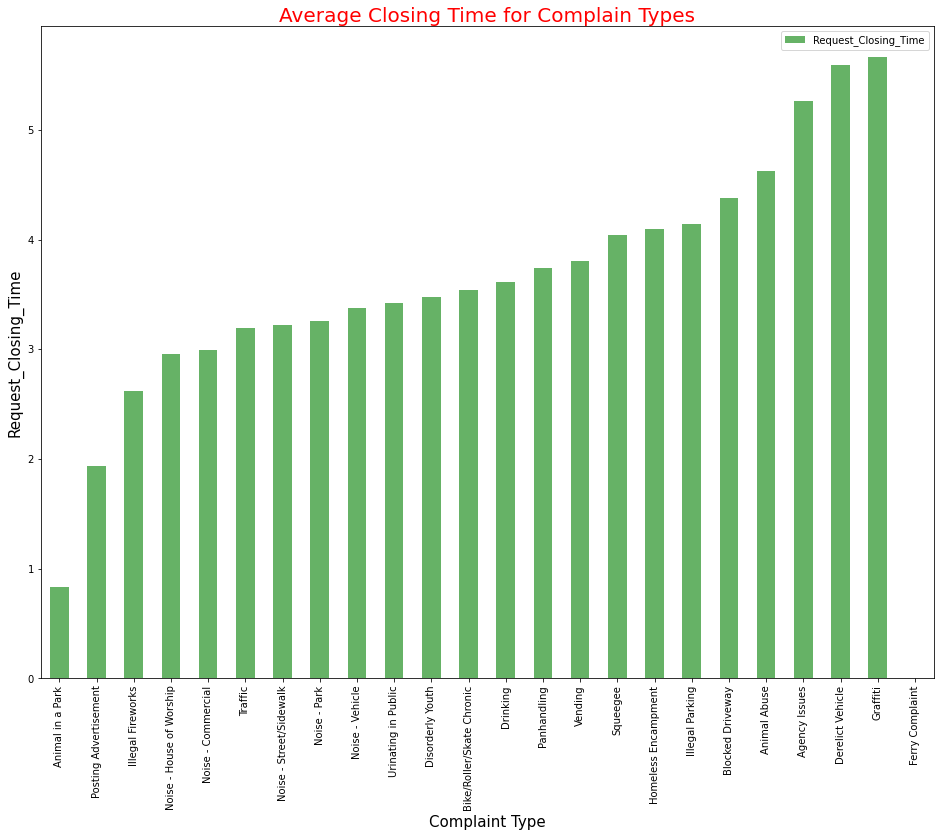

In [28]:
# Graph representing cities and complaints registered 
Test_df1.sort_values(by='Request_Closing_Time').plot(kind ='bar', alpha=0.6 ,figsize =(16,12),color='green')
plt.title("Average Closing Time for Complain Types", fontsize = 20, color='red',pad ='3.0')
plt.xlabel('Complaint Type', fontsize = 15)
plt.ylabel('Request_Closing_Time' , fontsize = 15)
plt.show()

In [29]:
#Top 10 comaplints with largest average closing time 
groupby_closing_time = Test_df1['Request_Closing_Time'].nlargest(5)
Avg_closing_time = pd.DataFrame(groupby_closing_time)
Avg_closing_time

Request_Closing_Time
Complaint Type                        
Graffiti                      5.664526
Derelict Vehicle              5.588838
Agency Issues                 5.260324
Animal Abuse                  4.626220
Blocked Driveway              4.384702

In [30]:
#Top 10 comaplints with less average closing time 
groupby_closing_time = Test_df1['Request_Closing_Time'].nsmallest(5)
Avg_closing_time = pd.DataFrame(groupby_closing_time)
Avg_closing_time

Request_Closing_Time
Complaint Type                                
Animal in a Park                      0.834722
Posting Advertisement                 1.938766
Illegal Fireworks                     2.618282
Noise - House of Worship              2.960790
Noise - Commercial                    2.991226

### Conclusion 

- Graffiti has the highest Request_Closing_Time (5.664526 hrs)
- Animal in park has the lowest Request_Closing_Time (0.834722 hrs)

In [31]:
Borough_df =Complaints[['Borough','Complaint Type']]
Borough_df.head()

Borough           Complaint Type
0  MANHATTAN  Noise - Street/Sidewalk
1     QUEENS         Blocked Driveway
2      BRONX         Blocked Driveway
3      BRONX          Illegal Parking
4     QUEENS          Illegal Parking

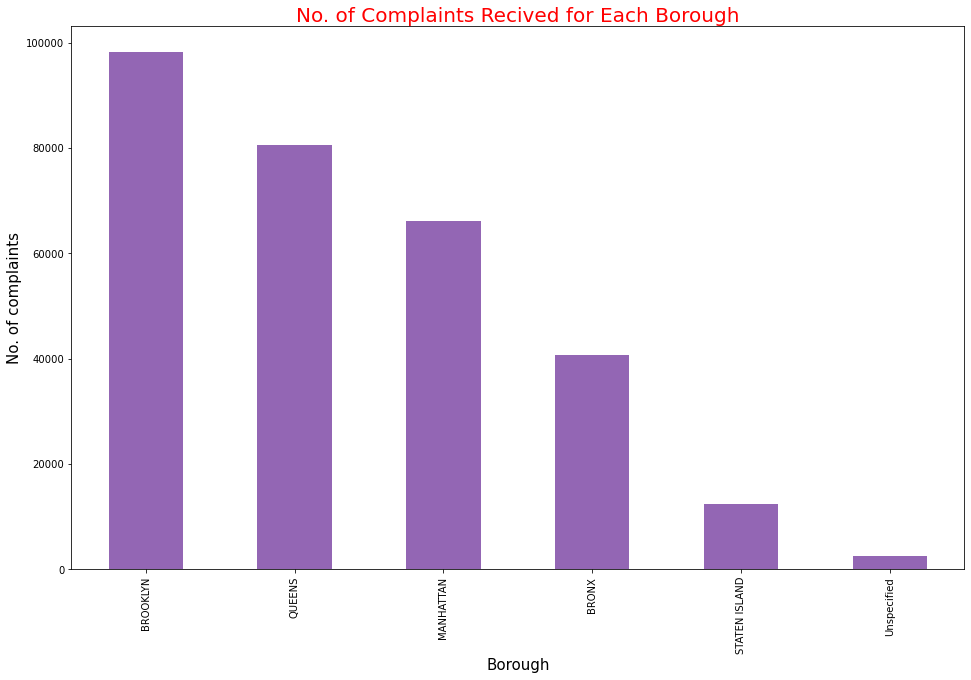

In [48]:
# Graph representing Borough and complaints registered 
Borough_df['Borough'].value_counts().plot(kind ='bar', alpha=0.6 ,figsize =(16,10),color='indigo')
plt.title("No. of Complaints Recived for Each Borough", fontsize = 20, color='red',pad ='3.0')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of complaints' , fontsize = 15)
plt.show()

In [33]:
# Order of the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
df3 = Complaints[['City','Complaint Type','Request_Closing_Time']]
df4 = df3.groupby(by=['City','Complaint Type']).mean()
df4.sort_values(by=['City','Request_Closing_Time','Complaint Type'])

Request_Closing_Time
City     Complaint Type                               
ARVERNE  Drinking                             0.238611
         Vending                              0.483333
         Urinating in Public                  0.691944
         Panhandling                          1.033333
         Noise - Park                         1.283333
...                                                ...
Woodside Noise - Commercial                   2.394167
         Noise - Street/Sidewalk              3.411278
         Derelict Vehicle                     4.966667
         Illegal Parking                      4.979203
         Blocked Driveway                     6.406212

[764 rows x 1 columns]

## Hypothesis Testing 

### Case1
- H0 --> Average Response_Closing_Time across the Complaint Types is same
- H1 --> Average Response_Closing_Time across the Complaint Types isn't same 

In [34]:
# Importing requires libraries for hypothesis testing
import pingouin as pg
from scipy.stats import chi2_contingency,chi2

In [35]:
Complaint_Response_Time = Complaints[['Complaint Type','Request_Closing_Time']]

In [36]:
aov = pg.anova(dv = 'Request_Closing_Time', between ='Complaint Type', data = Complaint_Response_Time, detailed = True)
aov

Source            SS      DF           MS           F  p-unc  \
0  Complaint Type  1.407689e+05      22  6398.586790  443.372575    0.0   
1          Within  4.307999e+06  298511    14.431625         NaN    NaN   

        np2  
0  0.031642  
1       NaN

- The one-way ANOVA showed that average Response_Closing_Time across the Complaint Type isn't same, F(22, 298511) = 443.372575,   p = 0.0.
- So, we regecting the null hypothesis . 

---

### Case 2

- H0 --> The type of complaint or service requested and location aren't related
- H1 --> The type of complaint or service requested and location are related 

In [37]:
# creating a new dataframe with Complaint Type and Location Type 
group = Complaints[['Location Type','Complaint Type']]
group_count = group.count()

In [38]:
# checking NaN values 
chi_test = group.fillna(value=0)
chi_test.head()

Location Type           Complaint Type
0  Street/Sidewalk  Noise - Street/Sidewalk
1  Street/Sidewalk         Blocked Driveway
2  Street/Sidewalk         Blocked Driveway
3  Street/Sidewalk          Illegal Parking
4  Street/Sidewalk          Illegal Parking

In [39]:
# checking size of dataset
chi_test.shape

(300698, 2)

In [40]:
# # dropping NaN values
# Chi_test = df_6.dropna()
# Chi_test.head()

In [41]:
# selecting field to test for the association 
myField1 = chi_test['Location Type']
myField2 = chi_test['Complaint Type']

In [42]:
#To get a quick look at the counts from these we can use Pandas 'crosstab'
myCrosstable = pd.crosstab(myField1,myField2)
myCrosstable.head()

Complaint Type       Agency Issues  Animal Abuse  Animal in a Park  \
Location Type                                                        
0                                6             3                 0   
Bridge                           0             0                 0   
Club/Bar/Restaurant              0             0                 0   
Commercial                       0            62                 0   
Ferry                            0             0                 0   

Complaint Type       Bike/Roller/Skate Chronic  Blocked Driveway  \
Location Type                                                      
0                                            0                37   
Bridge                                       0                 0   
Club/Bar/Restaurant                          0                 0   
Commercial                                   0                 0   
Ferry                                        0                 0   

Complaint Type       Derelict Vehicle  Disorderly Youth  Drinking  \
Location Type                                                       
0                                   8                 0         1   
Bridge                              0                 0         0   
Club/Bar/Restaurant                 0                 0       366   
Commercial                          0                 0         0   
Ferry                               0                 0         0   

Complaint Type       Ferry Complaint  Graffiti  ...  Noise - House of Worship  \
Location Type                                   ...                             
0                                  0         0  ...                         2   
Bridge                             0         0  ...                         0   
Club/Bar/Restaurant                0         0  ...                         0   
Commercial                         0         0  ...                         0   
Ferry                              1         0  ...                         0   

Complaint Type       Noise - Park  Noise - Street/Sidewalk  Noise - Vehicle  \
Location Type                                                                 
0                               1                       11                3   
Bridge                          0                        0                0   
Club/Bar/Restaurant             0                        0                0   
Commercial                      0                        0                0   
Ferry                           0                        0                0   

Complaint Type       Panhandling  Posting Advertisement  Squeegee  Traffic  \
Location Type                                                                
0                              0                      1         0        5   
Bridge                         0                      0         0        0   
Club/Bar/Restaurant            0                      0         0        0   
Commercial                     0                      0         0        0   
Ferry                          0                      0         0        0   

Complaint Type       Urinating in Public  Vending  
Location Type                                      
0                                      1        2  
Bridge                                 0        0  
Club/Bar/Restaurant                   21        0  
Commercial                             0        0  
Ferry                                  0        0  

[5 rows x 24 columns]

In [43]:
myCrosstable.shape

(19, 24)

In [44]:
chi, pval, dof, exp = chi2_contingency(myCrosstable)
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1.They are related.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. They aren't related.""" % (significance))

p-value is:  0.0
chi=1652072.540954, critical value=462.440110

At 0.05 level of significance, we reject the null hypotheses and accept H1.They are related.


In [45]:
from scipy import stats 

In [46]:
alpha = stats.chi2.cdf(1652072.540954,414)
alpha

1.0